In [7]:
import pandas as pd
import numpy as np
# Загружаем файл
file_path = "dt.csv"
df = pd.read_csv(file_path)
df.head()

,Название,Компания,Требования,Обязаности,Зарплата,Опыт работы,Ссылка
0,Сетевой инженер,Турболинк,Глубокие знания сетевых технологий (стек TCP/I...,Администрирование сетевого оборудования (инста...,350000 - 400000 RUR,От 3 до 6 лет,https://hh.ru/vacancy/118439765
1,Специалист по антитеррористической защищенности,Киностудия им. М. Горького,Опыт работы на релевантной позиции от 2-х лет....,Организовывать работы по обеспечению антитерро...,Не указана,От 1 года до 3 лет,https://hh.ru/vacancy/118467981
2,Специалист по IT,Торгпром,Владение языками программирования: C++ / SQL /...,NaN,300000 - 2500000 RUR,От 1 года до 3 лет,https://hh.ru/vacancy/118279002
3,Разработчик Python,SberTech,Опыт разработки на Python от 3-х лет (ООП и па...,Разрабатывать продуктовые сервисы и автоматизи...,Не указана,От 1 года до 3 лет,https://hh.ru/vacancy/118226958
4,Инженер UNIX/SAN-инфраструктуры,NGRServices,Глубокие знания и минимум 5 лет опыта в админи...,Администрирование серверов на базе Linux и соп...,Не указана,Более 6 лет,https://hh.ru/vacancy/117562577


In [1]:
import pandas as pd
import numpy as np
import re

# Курсы валют
exchange_rates = {
    "$": 92.5,   # 1 доллар = 92.5 руб.
    "€": 100.2,  # 1 евро = 100.2 руб.
    "₽": 1       # Рубли остаются без изменений
}

# Функция для обработки зарплаты (извлечение чисел и перевод валют)
def parse_salary(salary):
    if pd.isna(salary) or "Не указана" in str(salary):
        return np.nan
    
    salary = salary.replace(" ", "")  # Убираем пробелы
    match = re.match(r"([\$\€₽]?)(\d+)-?(\d+)?", salary)  # Ищем валюту и числа
    if not match:
        return np.nan

    currency, min_val, max_val = match.groups()
    min_val = int(min_val)
    max_val = int(max_val) if max_val else min_val  # Если одно число, берем его же
    avg_salary = (min_val + max_val) / 2  # Среднее значение

    return avg_salary * exchange_rates.get(currency, 1)  # Конвертируем в рубли

# Функция для форматирования зарплаты (100000 → 100K)
def format_salary(value):
    if pd.isna(value):
        return np.nan
    if value >= 1000:
        return int(value // 1000)
    return str(value)

# Функция для обработки опыта работы
def parse_experience(exp):
    if pd.isna(exp):
        return np.nan
    exp = str(exp)
    if "Более 6 лет" in exp:
        return 7
    if "От 3 до 6 лет" in exp:
        return 4.5
    if "От 1 года до 3 лет" in exp:
        return 2
    if "Нет опыта" in exp:
        return 0
    return np.nan

# Загружаем файл
file_path = "dt.csv"
df = pd.read_csv(file_path)

# Обрабатываем зарплату
df["Зарплата"] = df["Зарплата"].apply(parse_salary)
df["Зарплата"] = df["Зарплата"].apply(format_salary)

# Обрабатываем опыт работы
df["Опыт работы"] = df["Опыт работы"].apply(parse_experience)

# Выводим результат
print(df[["Зарплата", "Опыт работы"]].head())

# Выведем первые строки после обработки

  Зарплата  Опыт работы
0      375          4.5
1      NaN          2.0
2     1400          2.0
3      NaN          2.0
4      NaN          7.0


In [2]:
df

,Название,Компания,Требования,Обязаности,Зарплата,Опыт работы,Ссылка
0,Сетевой инженер,Турболинк,Глубокие знания сетевых технологий (стек TCP/I...,Администрирование сетевого оборудования (инста...,375,4.5,https://hh.ru/vacancy/118439765
1,Специалист по антитеррористической защищенности,Киностудия им. М. Горького,Опыт работы на релевантной позиции от 2-х лет....,Организовывать работы по обеспечению антитерро...,NaN,2.0,https://hh.ru/vacancy/118467981
2,Специалист по IT,Торгпром,Владение языками программирования: C++ / SQL /...,NaN,1400,2.0,https://hh.ru/vacancy/118279002
3,Разработчик Python,SberTech,Опыт разработки на Python от 3-х лет (ООП и па...,Разрабатывать продуктовые сервисы и автоматизи...,NaN,2.0,https://hh.ru/vacancy/118226958
4,Инженер UNIX/SAN-инфраструктуры,NGRServices,Глубокие знания и минимум 5 лет опыта в админи...,Администрирование серверов на базе Linux и соп...,NaN,7.0,https://hh.ru/vacancy/117562577
...,...,...,...,...,...,...,...
1995,Инженер DevOps / ДевОпс,MLM Soft,Linux (Ubuntu/Debian). Контейнеризация kuberne...,Обеспечение DevOps инфраструктуры и автоматиза...,200,7.0,https://hh.ru/vacancy/117380958
1996,Инженер SIEM,ГКУ Инфогород,Высшее образование по направлению ИБ. Опыт раб...,"Администрировfnm СЗИ: MaxPatrol SIEM, Security...",NaN,2.0,https://hh.ru/vacancy/118277989
1997,Application Security Engineer (безопасность пр...,ПСБ (ПАО «Промсвязьбанк»),Понимание архитектуры построения современной w...,Участие в проектах по обеспечению ИБ во внедря...,NaN,2.0,https://hh.ru/vacancy/86043215
1998,Архитектор систем ИБ (аутентификация и биометрия),Инфосистемы Джет,Опыт работы в сфере IT от 5 лет,Выявление и согласование требований к Системе....,NaN,7.0,https://hh.ru/vacancy/108195525


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убираем строки с пропущенными значениями
df_ed = df[df['Требования'].str.contains('Высшее образование', na=False)]
df_wed = df[~df['Требования'].str.contains('Высшее образование', na=False)]

df_ed.head()


,Название,Компания,Требования,Обязаности,Зарплата,Опыт работы,Ссылка
22,Инженер по информационной безопасности,Xello,Опыт установки и администрирования серверных О...,Управление техническими аспектами продукта ком...,NaN,0.0,https://hh.ru/vacancy/118251741
23,Техник по защите информации,"Останкино, Телевизионный технический центр",Высшее образование (сфера ИБ). Практический оп...,Администрирование средств защиты информации (D...,190,0.0,https://hh.ru/vacancy/118283497
24,Дата-инженер / Data-engineer,Kuppersberg,Высшее образование. Желательно дополнительное ...,Интеграция данных в DWH при помощи Python/API ...,230,4.5,https://hh.ru/vacancy/118342268
35,Специалист по защите информации,ФГБУ НИЦИ МИД России,Высшее образование по профилю ИТ или ИБ. Опыт ...,Мониторинг и анализ событий информационной без...,150,2.0,https://hh.ru/vacancy/118105784
39,Системный администратор Windows,ФИНТЕХ,Высшее образование в области информационных те...,Федеральный центр обработки данных Пограничной...,140,4.5,https://hh.ru/vacancy/117412330


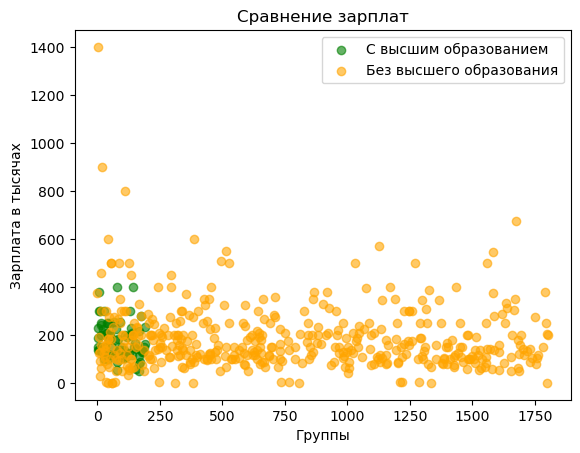

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
df_with_higher_edu = df_ed
df_without_higher_edu = df_wed
# Предположим, что df_with_higher_edu и df_without_higher_edu уже созданы
n = range(len(df_with_higher_edu))  # Индексы строк
n2 = range(len(df_without_higher_edu))  

plt.scatter(n, df_with_higher_edu["Зарплата"], label="С высшим образованием", color="green",alpha=0.6)
plt.scatter(n2, df_without_higher_edu["Зарплата"], label="Без высшего образования", color="orange", alpha=0.6)

# Добавление подписей и легенды
plt.xlabel("Группы")
plt.ylabel("Зарплата в тысячах")
plt.legend()
plt.title("Сравнение зарплат")

plt.show()


Название        object
Компания        object
Требования      object
Обязаности      object
Зарплата        object
Опыт работы    float64
Ссылка          object
dtype: object
Название        object
Компания        object
Требования      object
Обязаности      object
Зарплата        object
Опыт работы    float64
Ссылка          object
dtype: object


C:\Users\adm\AppData\Local\Temp\ipykernel_14808\645050737.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_higher_edu["Зарплата"] = pd.to_numeric(df_with_higher_edu["Зарплата"], errors="coerce")
C:\Users\adm\AppData\Local\Temp\ipykernel_14808\645050737.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_higher_edu["Зарплата"] = pd.to_numeric(df_without_higher_edu["Зарплата"], errors="coerce")
C:\Users\adm\AppData\Local\Temp\ipykernel_14808\645050737.py:17: FutureWarning: A value is t

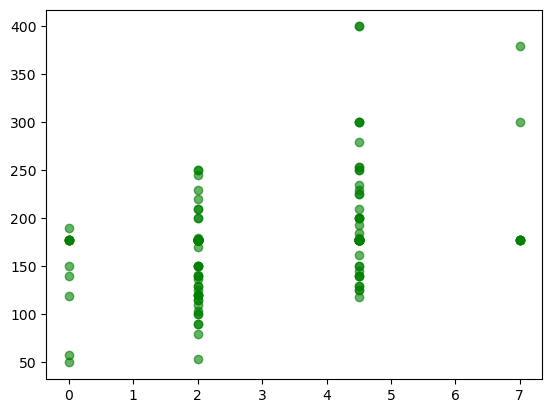

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Проверим тип данных в зарплате
print(df_with_higher_edu.dtypes)
print(df_without_higher_edu.dtypes)

# Преобразуем зарплату в числовой формат, если нужно
df_with_higher_edu["Зарплата"] = pd.to_numeric(df_with_higher_edu["Зарплата"], errors="coerce")
df_without_higher_edu["Зарплата"] = pd.to_numeric(df_without_higher_edu["Зарплата"], errors="coerce")

# Заполним пропущенные значения средним значением
df_with_higher_edu["Зарплата"].fillna(df_with_higher_edu["Зарплата"].mean(), inplace=True)
df_without_higher_edu["Зарплата"].fillna(df_without_higher_edu["Зарплата"].mean(), inplace=True)

# Добавляем метки классов
df_with_higher_edu["Высшее_образование"] = 1
df_without_higher_edu["Высшее_образование"] = 0

# Объединяем данные

# Проверяем, как выглядят данные

# Выбираем признаки (зарплату) и целевую переменную
X1 = df_with_higher_edu[["Зарплата"]]
y1 = df_with_higher_edu["Опыт работы"]

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=42)

clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)  # Обучаем на тренировочных данных

# Делаем предсказания
y_pred = clf.predict(X_test)

# Добавляем предсказанные значения в DataFrame
df_test = df.iloc[X_test.index]  # Индексы из X_test
df_test["Зарплата_предсказано"] = y_pred

# Визуализация данных
plt.scatter(df_with_higher_edu["Опыт работы"], df_with_higher_edu["Зарплата"], label="С высшим образованием", color="green", alpha=0.6)


C:\Users\adm\AppData\Local\Temp\ipykernel_14808\2556158350.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Зарплата_предсказано"] = y_pred


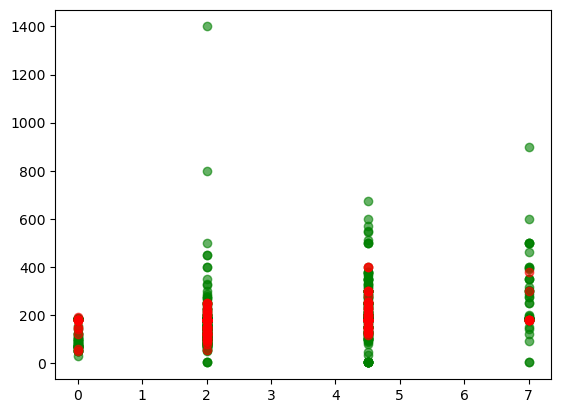

In [6]:
X2 = df_without_higher_edu[["Зарплата"]]
y2 = df_without_higher_edu["Опыт работы"]

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.15, random_state=42)

# Обучаем модель
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)  # Обучаем на тренировочных данных

# Делаем предсказания
y_pred = clf.predict(X_test)

# Добавляем предсказанные значения в DataFrame
df_test = df.iloc[X_test.index]  # Индексы из X_test
df_test["Зарплата_предсказано"] = y_pred
# Визуализация данных
plt.scatter(df_without_higher_edu["Опыт работы"], df_without_higher_edu["Зарплата"], label="С высшим образованием", color="green", alpha=0.6)
plt.scatter(df_with_higher_edu["Опыт работы"], df_with_higher_edu["Зарплата"], label="С высшим образованием", color="red", alpha=0.6)
